In [6]:
# 一対他法
# モデルを9個作る
import numpy as np 
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import time
%matplotlib inline

In [7]:
# loading training set
X_train = []

for i in range(10):
    X_train.append(np.loadtxt("digit/digit_train"+str(i)+".csv", delimiter=","))

X_train = np.array(X_train, dtype="float64")
X_train = X_train.reshape(5000,256)
print(X_train.shape)

(5000, 256)


In [8]:
# Y_trainを9個作る。
Y = []
for i in range(10):
    _ = [-1 for i in range(5000)]
    _[i*500:i*500+500] = np.ones(500, dtype=int)
    Y.append(_)
Y = np.array(Y, dtype='float64')

In [9]:
# Test Set
X_test = []
for i in range(10):
    X_test.append(np.loadtxt("digit/digit_test"+str(i)+".csv", delimiter=","))
X_test= np.array(X_test, dtype="float64")
X_test = X_test.reshape(2000, 256)

Y_test = []
for i in range(10):
    m = i
    _ = [m for i in range(200)]
    Y_test.extend(_)
Y_test = np.array(Y_test, dtype="float64").reshape(-1,1)

In [10]:
# Gausian Kernel Matrix
def design_mat(x, c, h=10):
    k = rbf_kernel(x, c, gamma=1/(2*(h**2)))
    return k

In [11]:
# Regression with Ridge
# and predict
# ‘cholesky’, 'saga’
def ridge(*design_mat, Y_train, lamda=1):
    k, k_test = design_mat
    clf = Ridge(alpha=lamda, solver='cholesky')
    clf.fit(k, Y_train)
    p = clf.predict(k_test)
    return p

In [20]:
# Calculate design matrix
k = design_mat(X_train, X_train)
k_test = design_mat(X_test, X_train)

In [21]:
predict = []
# モデルを10個作成
for i in tqdm(range(10)):
    Y_train = Y[i].reshape(-1, 1)
    _ = ridge(k, k_test, Y_train=Y_train)
    predict.append(_)
predict = np.array(predict)

In [22]:
# 1対他法によって0~9に変換
predict_modified = np.array([np.argmax(predict[:, i]) for i in range(2000)]).reshape(-1,1)
same_index = np.where(predict_modified==Y_test, True, False)
mis_specified = np.where(same_index==False)[0]
print("Accuracy: {}%".format(*(sum(same_index)/len(Y_test))*100))

Accuracy: 95.7%


[ 936 1179 1063 1592]


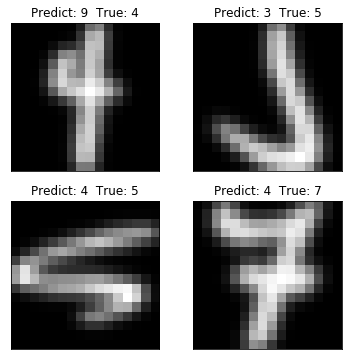

In [23]:
#間違えたものを表示する
# 画像確認
mis_specified = np.random.choice(mis_specified, 4, replace=True)
print(mis_specified)
plt.figure(figsize=(6,6))
for i,k in enumerate(mis_specified):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Predict: {}  True: {}".format(int(predict_modified[k]), int(Y_test[k])))
    plt.imshow(X_test[k].reshape(16,16), cmap="gray")
plt.savefig("result.png")
plt.show()
plt.close()

In [24]:
# 正誤を反映したグラフ
_ = np.where(predict_modified==Y_test, 10, 0)
for i in range(2000):
    if _[i] == 0:
        _[i] = predict_modified[i]        
confusion_matrix = np.zeros((10, 10), dtype=np.int64)
for i in range(10):
    list_ = []
    range_ = _[i * 200 : i * 200 + 200]
    for k in range(10):
        a = np.sum(range_==k)
        list_.append(int(a))
    confusion_matrix[i, :] = list_
    confusion_matrix[i, i] = int(sum(same_index[i * 200 : i * 200 + 200]))

In [25]:
# to csv
import pandas as pd
confusion_matrix = pd.DataFrame(confusion_matrix)
print(confusion_matrix)
confusion_matrix.to_csv("confusion_matrix.csv")

     0    1    2    3    4    5    6    7    8    9
0  196    0    1    0    0    0    3    0    0    0
1    0  199    1    0    0    0    0    0    0    0
2    0    0  191    0    6    0    0    2    1    0
3    0    0    0  189    0    6    0    1    4    0
4    0    1    0    0  186    0    4    0    1    8
5    3    0    1    4    2  186    0    0    0    4
6    1    0    2    0    1    2  194    0    0    0
7    0    1    1    0    4    0    0  189    0    5
8    1    0    1    3    0    1    0    0  192    2
9    1    1    0    0    1    0    0    3    2  192
